## Importing the libraries 

In [62]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt


## Importing thee dataset 

In [63]:
independent = pd.read_csv('/content/Movie_collection_Independent.csv')
target = pd.read_csv('/content/Movie_collection_Target.csv')

### Understanding the dataset

In [64]:
print(independent.shape)
independent.head()

(506, 19)


,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [65]:
print(target.shape)
target.head()

(506, 1)


,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


## Spliting the data in train and test 

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train , x_test = train_test_split(independent,random_state=42)
y_train , y_test = train_test_split(target,random_state=42)

output of the shape of splited data 

In [95]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (284, 19)
shape of y_train: (284, 1)
shape of x_test: (127, 19)
shape of y_test: (127, 1)


#### Spliting the train data in to train and validate 

In [69]:
x_train ,x_valid = train_test_split(x_train,random_state= 42)
y_train , y_valid = train_test_split(y_train, random_state =42) 

In [94]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_valid:",x_valid.shape)
print("shape of y_valid:",y_valid.shape)

shape of x_train: (284, 19)
shape of y_train: (284, 1)
shape of x_valid: (95, 19)
shape of y_valid: (95, 1)


## Standardising the data

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_valid = scaller.transform(x_valid)
x_test = scaller.transform(x_test)

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

## Buliding the model 

In [74]:
model =  keras.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_shape = [19]))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(1))

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                600       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer= keras.optimizers.SGD(learning_rate=1e-2),
              loss = 'mean_squared_error',
              metrics =['mae'])

## Training the model 

In [77]:
traied_model  = model.fit(x_train,y_train,epochs=100,validation_data=(x_valid,y_valid))

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 3.7051 - mae: 1.6837 - val_loss: 1.5134 - val_mae: 1.0270
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8049 - mae: 0.7017 - val_loss: 0.7741 - val_mae: 0.6938
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5344 - mae: 0.5752 - val_loss: 0.5643 - val_mae: 0.5909
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4031 - mae: 0.4938 - val_loss: 0.4334 - val_mae: 0.5210
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3196 - mae: 0.4360 - val_loss: 0.3577 - val_mae: 0.4742
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2654 - mae: 0.3940 - val_loss: 0.3054 - val_mae: 0.4403
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2292 - mae: 0.3646 - val_loss: 0.2627 - val_mae: 0.4063
Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2028 - mae: 0.3400 - va

## Performace Graph 

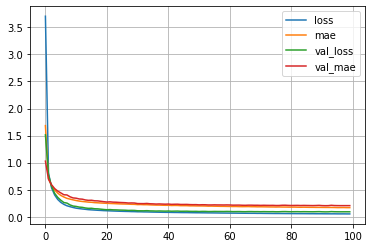

In [96]:
pd.DataFrame(traied_model.history).plot()
plt.grid(True)

## Model Evaluation 

In [78]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2852 - mae: 0.2786


[0.2852456271648407, 0.2785837948322296]

#### Predicting the first 5 vlues from test set 

In [79]:
x_new = x_test[:5]


In [81]:
y_pred = model.predict(x_new)

In [102]:
print("the actual value are ","\n",y_test[:5])

the actual value are  
      Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000


In [99]:
print("the predicted value are ","\n", y_pred)

the predicted value are  
 [[2.5145757]
 [2.663156 ]
 [1.8457001]
 [2.4707603]
 [1.7309107]]
